IRIS FLOWER SPECIES CLASSIFICATION

This project is made to classify the flower species. This a basic tensorflow machine learning project which is basically used to classify different flowers according to their species. I took a dataset named iris from the site"kaggle". 
I firstly cleaned the data and then applied classification techniques to classify the species, I used tensorflow model named 'keras' with the help o which i clearly classified the data and made clear predictions. 

**Importing Libraries**

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
%matplotlib inline

import random 
import time
import scipy as sp

# warnings
import warnings
warnings.filterwarnings('ignore')

**Read dataset**

In [500]:
iris = pd.read_csv('IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [501]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [502]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [503]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [504]:
#checking for null values
iris.isna().values.any()

False

In [505]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [506]:
iris.shape

(150, 5)

**Visualizations**

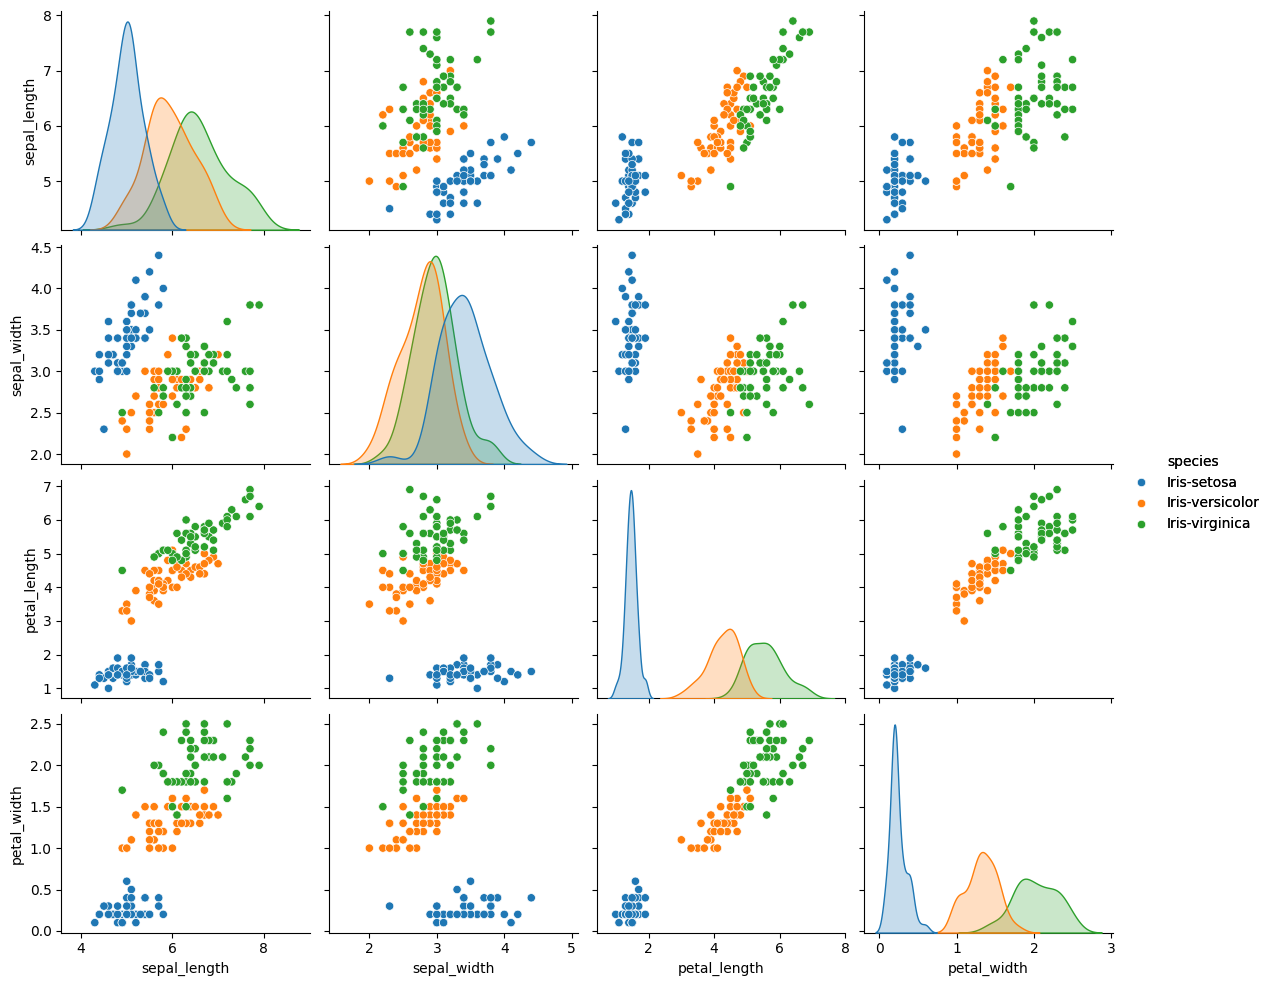

In [507]:
# Visualize data with Seaborn
graphs = sns.pairplot(iris, hue="species", size= 2.5).add_legend()

**Predictions**

In [508]:
data = shuffle(iris)


i = 8
data_to_predict = data[:i].reset_index(drop = True)
predict_species = data_to_predict.species 
predict_species = np.array(predict_species)
prediction = np.array(data_to_predict.drop(['species'],axis= 1))

data = data[i:].reset_index(drop = True)

In [509]:
X = data.drop(['species'], axis = 1)
X = np.array(X)
Y = data['species']

In [510]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = tf.keras.utils.to_categorical(Y)

In [511]:
# train_test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

print('Shape of the x_train:', X_train.shape)
print('Shape of the y_train:', Y_train.shape)
print('Shape of the x_test:', X_test.shape)
print('Shape of the y_test:', Y_test.shape)

Shape of the x_train: (127, 4)
Shape of the y_train: (127, 3)
Shape of the x_test: (15, 4)
Shape of the y_test: (15, 3)


In [512]:
input_dim = len(data.columns) - 1

model = Sequential()
model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, Y_train, epochs = 10, batch_size = 2)

scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3176 - loss: 1.0603
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3176 - loss: 0.9927
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3876 - loss: 0.8960
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6668 - loss: 0.7970
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8442 - loss: 0.7167
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.6437
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9275 - loss: 0.5665
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.4848
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9693 - loss: 0.4056
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.3348
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step - accuracy: 0.9333 - loss: 0.3141

compile_metrics: 93.33%


In [513]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
prediction_ = encoder.inverse_transform(predicted_classes)

for i, j in zip(prediction_, predict_species):
    print(" The nn predict {}, and the species to find is {}".format(i,j))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
 The nn predict Iris-virginica, and the species to find is Iris-versicolor
 The nn predict Iris-setosa, and the species to find is Iris-setosa
 The nn predict Iris-versicolor, and the species to find is Iris-virginica
 The nn predict Iris-virginica, and the species to find is Iris-virginica
 The nn predict Iris-setosa, and the species to find is Iris-versicolor
 The nn predict Iris-virginica, and the species to find is Iris-setosa
 The nn predict Iris-setosa, and the species to find is Iris-setosa
 The nn predict Iris-virginica, and the species to find is Iris-virginica
